In [ ]:
'''
############################################################################
AT: very nice!

100% / 95% / 100% + Bonus

############################################################################
'''

## Hopfield Network
Models of Neural Systems, WS 2021/22; Computer Practical 2

*Gonzalo Cardenal, Sofia Pereira da Silva* 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1.
#### Weights Initialization
Firstly, we compute our array with the 3 initial patterns and we initialize the weights by making a matrix multiplication of the pattern array with its transposed (this will be equal to taking the dot product of the states of the respective patterns). So, generally:
$$
w_{ij}= \sum_{K=1}^{3}  s_i^K s_j^K
$$

In [ ]:
patterns = np.array([[1, -1, 1, -1], [-1, 1, 1, 1,], [-1, -1, -1, 1]])
print(patterns)

[[ 1 -1  1 -1]
 [-1  1  1  1]
 [-1 -1 -1  1]]


In [ ]:
def sign(z):  #as np.sign function gives 0 at 0, we define sign instead of using np.sign
    if z[i] >= 0:
        return 1
    if z[i] < 0:
        return -1

As no unit has a connection with itself ( $w_{ii}$ = 0, $\forall i $), we substract the main diagonal with $np.eye$ (which gives us an array with ones in the main diagonal) multiplied by the number of patterns (= $ \sum_{K=1}^{3} s_i^K s_i^K $ ):

In [ ]:
weights = (patterns.T @ patterns) 
weights = weights -np.eye(4)*3
print("These are the weights that store patterns A/B/C:") 
print(weights)

These are the weights that store patterns A/B/C:
[[ 0. -1.  1. -3.]
 [-1.  0.  1.  1.]
 [ 1.  1.  0. -1.]
 [-3.  1. -1.  0.]]


#### State Update and Stability condition
A pattern is stable if it fullfills the condition:
$$
sign(\sum_{j}w_{ij}p_j) = p_i \text {, }\forall i 
$$
 that is, if a state update produces no state.

Therefore, we defined a function for the state update (somewhat similar to our McCulloch-Pitts neuron in the last exercise sheet) and applied it (simmultaneously) for each pattern as the initial state:

In [ ]:
def state_update(networkstate, weights):
    i = np.random.randint(0,3)
    unitupdate = np.sign(np.dot(weights[:,i],networkstate))
    networkstate[i] = unitupdate
    return networkstate

In [ ]:
p_minus1 = patterns
for t in range(0,1000):
    p = np.array([state_update(p_minus1[i,:], weights) for i in  np.arange(p_minus1.shape[0])])
    p_minus1 = p
p

array([[ 1, -1,  1, -1],
       [-1,  1, -1,  1],
       [-1,  1, -1,  1]])

As we can observe, only the first pattern stayed the same after computing various state updates at random units. That means that, for pattern A, the stability criterium is met, thus A is a stable state/ attractor that the network converges to. In patterns B and C, however, this does not happen. Therefore, patterns B and C are not stable states. This has to do with the fact that no units have self-connections, which affects the stability. In other words, removing the self-connections adds errors to the system.

If we were to run the same function without having 0s on the diagonal of the weight matrix, we would have 3 attractors instead of just one:

In [ ]:
weights_withselfconnections = (patterns.T @ patterns)

for t in range(0,1000):
    p2 = np.array([state_update(patterns[i,:], weights_withselfconnections) for i in  np.arange(patterns.shape[0])])
print(p2)

[[ 1 -1  1 -1]
 [-1  1  1  1]
 [-1 -1 -1  1]]


## 2. 
Given pattern A/B/C as an initial state, what pattern does the network converge to? (Hint: Apply the asynchronous state update described above. Think about a convergence criterion.) Consider the following energy function for the network:
$$
E = - \sum_i \sum_j w_{ij}s_is_j
$$
Calculate the energy after each update step and plot it as a function of time.

-> First of all, in order to show the patterns the network converges to, we decided to introduce each pattern separately as the initial state and keep updating a random state at a time 1000 times:

In [ ]:
A = patterns[0,:]
B = patterns[1,:]
C = patterns[2,:]

In [ ]:
for t in range(0,1000):
    Aconvergence = np.array(state_update(A, weights))
Aconvergence

array([ 1, -1,  1, -1])

In [ ]:
for t in range(0,1000):
    Bconvergence = np.array(state_update(B, weights))
Bconvergence

array([-1,  1, -1,  1])

In [ ]:
for t in range(0,1000):
    Cconvergence = np.array(state_update(C, weights))
Cconvergence

array([-1,  1, -1,  1])

As stated previously, A is a stable state and therefore A as an initial state converges to A (doesn't change). 
One can tell that starting with both B and C converges to -A, which can be called a "reversed state" and is also an attractor of the network. This happens because, in both B and C, the majority of the state components are opposite to the ones of A.

Finally, we define a function for energy and one that stores the energy values for each time step, after each update step. This way, we are able to plot the energy function for the network vs. time.
(Note that we start by redefining the patterns because of the way Python is made to operate (it also updates the patterns)).

In [ ]:
patterns = np.array([[1, -1, 1, -1], [-1, 1, 1, 1,], [-1, -1, -1, 1]])
A = patterns[0,:]
B = patterns[1,:]
C = patterns[2,:]

In [ ]:
def energy(networkstate, weights):
    wtimesnetworkstate= weights @ networkstate
    netdiagonal= np.diag(networkstate)
    vectorofthefirstsum= wtimesnetworkstate @ netdiagonal
    e = - np.sum(vectorofthefirstsum)
    return e

In [ ]:
def energy_oft(t, networkstate, weights):
    
    e = []
    p_minus1 = networkstate
    e.append(energy(p_minus1, weights))
    for time in range(0,t):
        p = np.array(state_update(p_minus1, weights))
        e.append(energy(p, weights))
        p_minus1 = p
    return np.array(e)

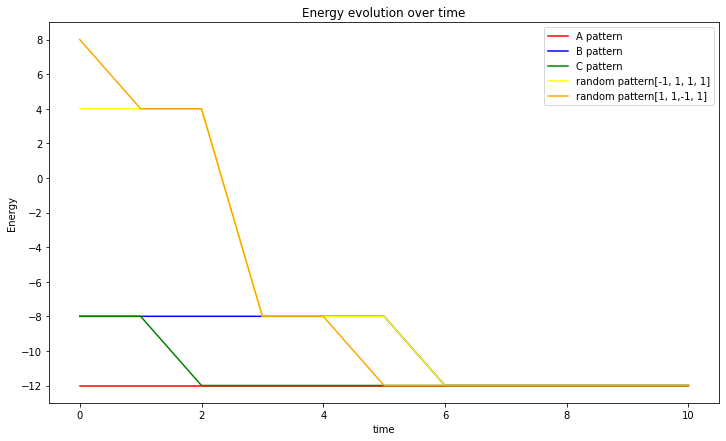

In [ ]:
patterns = np.array([[1, -1, 1, -1], [-1, 1, 1, 1,], [-1, -1, -1, 1]])
A = patterns[0,:]
B = patterns[1,:]
C = patterns[2,:]
plt.rcParams["figure.figsize"] = (12,7)
plt.yticks(np.arange(-14, 8+1, 2.0))
plt.plot(energy_oft(10, A, weights), label = "A pattern", c ='red')
plt.plot(energy_oft(10, B, weights), label = "B pattern", c ='blue')
plt.plot(energy_oft(10, C, weights), label = "C pattern", c ='green')
plt.plot(energy_oft(10,[1,-1,-1,1], weights), label = "random pattern[-1, 1, 1, 1]", c ='yellow')
plt.plot(energy_oft(10,[1,1,-1,1], weights), label = "random pattern[1, 1,-1, 1]", c ='orange')
plt.xlabel("time")
plt.ylabel("Energy")
plt.title("Energy evolution over time")
plt.legend()
plt.show()

As expected, we can see that the energies of the states either remain the same or decrease. Eventually, all of the patterns converge to a state with the minimum energy (= -12 energy units), which corresponds to either A or -A. Therefore, starting with state A translates to a line with slope 0. B and C converge more quickly to the minimal energy than other patterns we tried (that were further apart from A/-A).

In [ ]:
'''
############################################################################

You could use also plt.subplots. This method may avoid that some plot lines overlap and superimpose others.  
You can also add the units of time, for example iterations, or epochs.

############################################################################
'''

## 3. 

Reuse the code developed for the toy example above to store and recall image patterns in a larger Hopfield network.

#### a. 
Load the numpy file ’images.npz’ in ipython. (Hint: np.load(’images.npz’)[’arr_0’] will return a 3D array with dimensions (k,v,h), where k is the number of patterns, v and h are the vertical and horizontal dimensions of the image.)

In [ ]:
image = np.load("images.npz")["arr_0"]
print(image.shape)

(8, 30, 40)


#### b.

Apply equation 2 to store the patterns into a weight matrix $W = {wij}$. (Hint(s): You will have to flatten the images from 2 dimensions into vectors. Applying matrix multiplication is always preferable to iteration over elements.)

In [ ]:
image[6,:,:].shape
#pd.DataFrame(image[0,:,:])

(30, 40)

In [ ]:
imagepat=image.reshape(8, 1200)
imagepat.shape

(8, 1200)

In [ ]:
imweights = imagepat.T @ imagepat
imweightso = imweights - np.eye(imweights.shape[0])*imweights[0,0]
print("These are the weights that store the 8 given patterns:")
print(imweightso)
print(imweightso.shape)

These are the weights that store the 8 given patterns:
[[0. 6. 6. ... 6. 8. 8.]
 [6. 0. 8. ... 4. 6. 6.]
 [6. 8. 0. ... 4. 6. 6.]
 ...
 [6. 4. 4. ... 0. 6. 6.]
 [8. 6. 6. ... 6. 0. 8.]
 [8. 6. 6. ... 6. 8. 0.]]
(1200, 1200)


In [ ]:
def imstate_update(networkstate, weights):
    i = np.random.randint(0,1200)
    unitupdate = np.sign(np.dot(weights[:,i],networkstate))
    networkstate[i] = unitupdate
    return networkstate

#### c. 

Which patterns are (un)stable?

In [ ]:
p_minus1 = imagepat
for t in range(0,100):
    for i in range(0,8):
        p = np.array(imstate_update(imagepat[i, :], imweightso))
        p_minus1 = p

print((imagepat == Iconvergence).all(axis=1))
#plt.imshow(imagepat[2].reshape(30,40))

[ True  True False  True  True  True  True  True]


It appears that all the initial patterns but 1 correspond to the respective convergence states (the comparison returns the value True for all but 1 pattern), that is, it appears that all but 1 patterns are stable states for this network. The third picture (the one that looks like a skull) is not an attractor because, after some state updates, the state converges to another image (the comparison returns value False). 

In [ ]:
#for t in range(0,1000):
#    I4convergence = np.array(state_update(imagepat[3, :], imweightso))
#    I4conver
#I4convergence
#(imagepat[:4,:] == I4convergence).all(axis=1)

In [ ]:
#for t in range(0,1000):
#    I1convergence = np.array(state_update(imagepat[0, :], imweightso))
#I1convergence

#if (imagepat[i, :] == I1convergence).all:
#    print(True)
    
    
#dif1 = np.sum(I1convergence - imagepat[0, :])
#print(dif1)

### d.Bonus

Start with a pattern consisting of random values 1 and update according to the rule in Equation 3 until reaching a stable state. Plot the initial pattern, the final stable state of the network, and the energy function over iterations. Repeat this step several times with different
random initial patterns. (Hint: Before plotting you should reshape the patterns from 1D arrays into 2D arrays using the method reshape((v,h)). For plotting, you can use pyplot.imshow(M), where M is a 2D array.) Interpret your results.

In [ ]:
#plt.imshow(image[0,:,:])

We start by creating the initial random patterns:

In [ ]:
conditions = [-1, 1]
random_pattern1 = np.random.choice(conditions, size=(30,40))
random_pattern2 = np.random.choice(conditions, size=(30,40))
random_pattern3 = np.random.choice(conditions, size=(30,40))

Initial Patterns


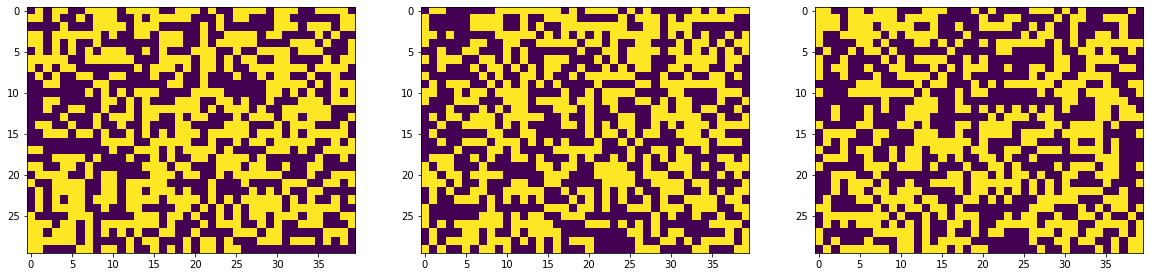

In [ ]:
print("Initial Patterns")

fig = plt.figure(figsize=(20, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(random_pattern1)
fig.add_subplot(1, 3, 2)
plt.imshow(random_pattern2)
fig.add_subplot(1, 3, 3)
plt.imshow(random_pattern3)

Then, we apply multiple state updates in order to reach the stable states:

In [ ]:
p_minus1_1 = random_pattern1.reshape(1200)
for t in range(0,100000):
    p = np.array(imstate_update(p_minus1_1[:], imweightso))
    p_minus1_1 = p
p_final1 = p

p_minus1_2 = random_pattern2.reshape(1200)
for t in range(0,100000):
    p = np.array(imstate_update(p_minus1_2[:], imweightso))
    p_minus1_2 = p
p_final2 = p
    
p_minus1_3 = random_pattern3.reshape(1200)
for t in range(0,100000):
    p = np.array(imstate_update(p_minus1_3[:], imweightso))
    p_minus1_3 = p
p_final3 = p

Stable states


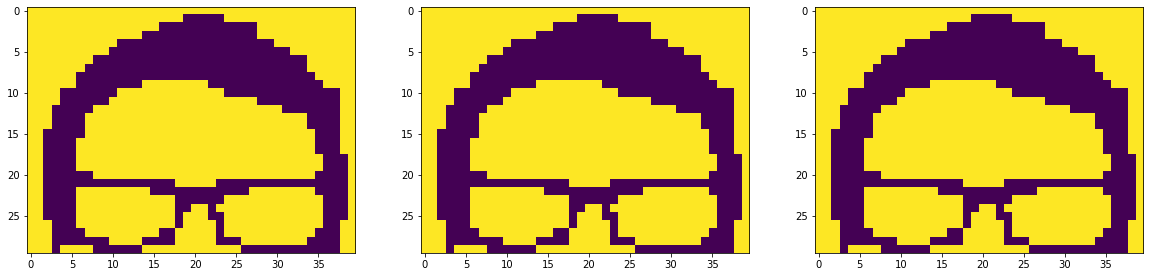

In [ ]:
print("Stable states")

fig = plt.figure(figsize=(20, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(p_final1.reshape(30,40))
fig.add_subplot(1, 3, 2)
plt.imshow(p_final1.reshape(30,40))
fig.add_subplot(1, 3, 3)
plt.imshow(p_final1.reshape(30,40))

Finally, we compute and plot the energy functions:

In [ ]:
def imenergy_oft(t, networkstate, weights):
    
    e = []
    p_minus1 = networkstate
    e.append(energy(p_minus1, weights))
    for time in range(0,t):
        p = np.array(imstate_update(p_minus1, weights))
        e.append(energy(p, weights))
        p_minus1 = p
    return np.array(e)

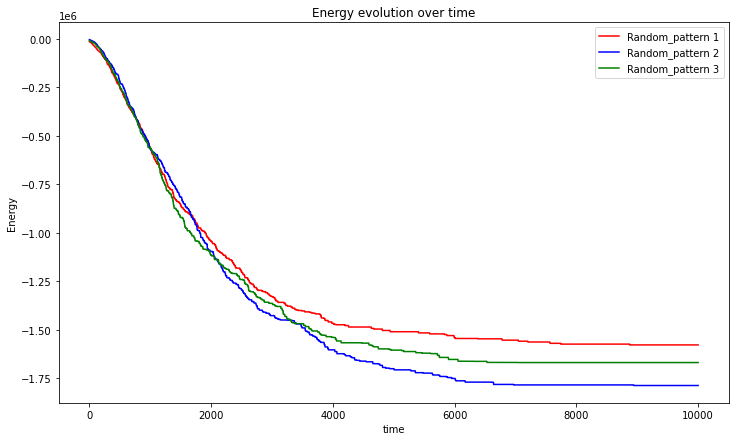

In [ ]:
plt.plot(imenergy_oft(10000, random_pattern1.reshape(1200), imweights), label = "Random_pattern 1", c ='red')
plt.plot(imenergy_oft(10000, random_pattern2.reshape(1200), imweights), label = "Random_pattern 2", c ='blue')
plt.plot(imenergy_oft(10000, random_pattern3.reshape(1200), imweights), label = "Random_pattern 3", c ='green')
plt.xlabel("time")
plt.ylabel("Energy")
plt.title("Energy evolution over time")
plt.legend()
plt.show()

All the states converge to a minimum. In this case, the pattern the random patterns converge to is the same, but the minimum is not equal (perhaps it would reach it if we let it run longer?)

In [ ]:
'''
############################################################################

Nice job!
The different random patterns may converge to different energy values. Meaning that the minimun values might not be equal.

############################################################################
'''